# Home Assignment 3 in Deep Learning [20 points]
**Goal:** Try out image classification using convolutional neural networks. <br />
**Grader:** Valter Schütz <br />
**Submitted by:** 📝 Name, email; Nils Ledin nilsled@student.chalmers.se

---

## General guielines 
* Answer all fields marked with 📝. This includes
    * your name and email address above, and
    * all later fields marked with "📝 Your answer here:".
* Feel free to add more cells if needed.
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook does not have to be run. The code in the notebook should reproduce the plots/results if we choose to run it. 
    * Do NOT hand in an assignment that isn't runnable!
* Do not modify the provided code unless told to do so.
* All tables and other additional information should be included in this notebook.
* Before submitting, make sure that your code can run on another computer, i.e. that all plots can show on another computer including all your writing.
* **Submit your solutions as a notebook file (`.ipynb`) and in HTML format (`.html`).**


> **Note:** Training neural networks is usually computationally demanding and may take time if you run it on your laptop. Running the code in Google Colab can be faster if you get access to a GPU. However, the models in this assignment are small enough that you will probably have no issues training on cpu.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

> **Note:** If you are using Google Colab and you would like to export the notebook to HTML format, you need to first download it through `File` $\rightarrow$ `Download as` $\rightarrow$ `ipynb` and then use the standard tool for Jupyter Notebook conversion, nbconvert: jupyter nbconvert --to html notebook.ipynb (you need to run it from the command line). For more info (and example), see [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab).



## Required software

For this assignment you will need to install the following Python packages:

- `pytorch` (package name `torch`): Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (make sure that you install it together with CUDA to enable GPU acceleration)
- `torchvision`: Typically installed with pytorch
- `numpy`: The fundamental package for scientific computing with Python (so fundamental there is a [Nature review](https://www.nature.com/articles/s41586-020-2649-2) on it) 
<!-- - `pandas`: Data analysis and manipulation tool -->
- `matplotlib`: Visualization with Python
- `pillow`: Image library to handle PIL images
- `catsndogs`: The data sets we will be working with
- `networkx`: Library for working with graphs and visualizing them.
- `ipykernel`: For running jupyter notebooks

> **Note:** In Google Colab you can install packages using   `!pip  install <package_name>`

> **Note:** In Google Colab several of these packages are preinstalled but it is a good habit to check if all required packages are installed beforehand and the installed versions of packages. Use `!pip list` to list packages installed by pip on Google Colab.

> **Note:** If you are running this on your own computer, we recommend that you install these packages in a [virtual environment](https://docs.python.org/3/library/venv.html) or [mamba](https://mamba.readthedocs.io/en/latest/index.html)/[conda](https://docs.anaconda.com/miniconda/). In my experience, `mamba` is significantly faster than `conda` at downloading packages.

To create a new environment using `mamba`, run
```bash
mamba create -n ml-hw3 python=3.13
```
and then activate it with
```bash
mamba activate ml-hw3
```

If you have `mamba` set up correctly, your `pip` command should now point to the newly activated environment
```bash
$ which pip
~/miniforge3/envs/ml-hw/bin/pip
```

Finally, install all the packages that will be needed using `pip`, starting with [pytorch](https://pytorch.org/get-started/locally/).

Before you run the rest of the notebook, make sure that the new environment is used. In VS code, there should be a "Select Kernel" button in the top right that you can click.

In [2]:
# Import all packages that will be required in the whole notebook
# If you later wonder where a class or function comes from, scroll up here
import networkx as nx
import matplotlib.pyplot as plt
from catsndogs.training import folder as train_folder, cats as train_cats, dogs as train_dogs
from catsndogs.test import folder as test_folder
import numpy as np
from PIL import Image
import torch
from torch import nn
from torchvision.transforms.functional import to_tensor, to_pil_image
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
from  torch.utils.data import DataLoader
import torch.optim as optim
%matplotlib inline

___

## Neural networks

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 4 features,  one hidden layer
with activations $\mathbf{y}_1$ and a two-dimensional output layer with activations $\mathbf{y}_2 = \hat{\mathbf{y}}$.

![Neural network illustration.](https://raw.githubusercontent.com/lovhag/TA_stuff/master/fnn.png)

The activations of a layer $k$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}^{(k)}$ to the input activations $\mathbf{y}_{k - 1}$ producing the intermediate values $\mathbf{z}_k$:

$$
z_{k , j} = \sum_i  y_{k - 1,i} w^{(k)}_{i, j}\\
$$

This is followed by the element-wise application of the layers'
activation function $g_k$ to the intermediate values $\mathbf{z}_k$:

$$
y_{k,j} = g_{k} (z_{k,j})
$$

> **Note:** Here we use the same notation as in the lecture slides, but several different notations exist.


## Exercise 1: Backpropagation by hand [2 points]

Given the derivatives of a loss term $E$ with respect to the activations of the output neurons 
$\frac{dE}{dy_{2,j}}$ (and the variables/functions in the description above), derive expressions for the derivatives of the loss term with respect to the weights
$w^{(k)}_{i,j}$ and activations $y_{k,j}$ of the remaining layers of the network.

Also, to simplify the results, you are encouraged to reuse derivatives you have already computed in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dw^{(2)}_{i, j}} = \: ? \\
\frac{dE}{dy_{1,j}} = \: ? \\
\frac{dE}{dw^{(1)}_{i, j}} = \: ? \\
\frac{dE}{dy_{0,j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the loss function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

Ensure that you
- Simplify your answers as much as possible, meaning that the grader should **not** have to look at your previous answers to understand your current answer
- Please show all the calculation details

#### TIP
Reasoning about the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) is often easier after drawing a [computational graph](https://www.geeksforgeeks.org/computational-graphs-in-deep-learning/). The network above can be illustrated as follows:

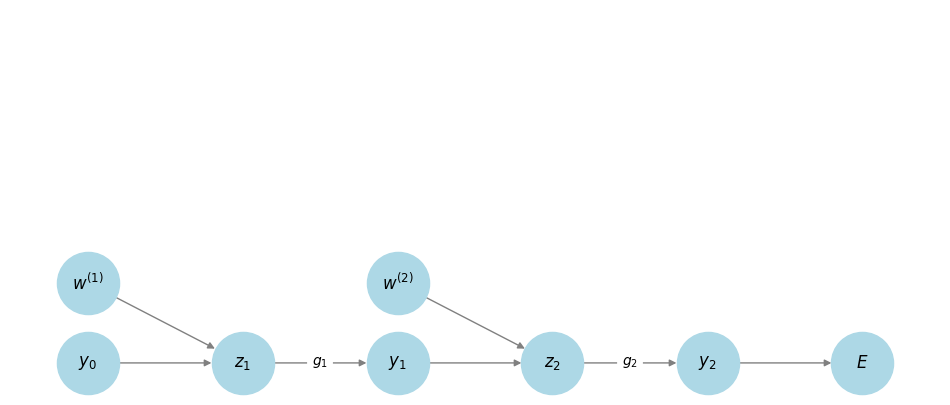

In [3]:
G = nx.DiGraph()

labels = {
    "y0": r"$y_0$",
    "w1": r"$w^{(1)}$",
    "z1": r"$z_1$",
    "y1": r"$y_1$",
    "w2": r"$w^{(2)}$",
    "z2": r"$z_2$",
    "y2": r"$y_2$",
    "E": r"$E$"
}

G.add_nodes_from(labels.keys())

edges = [("y0", "z1"), ("w1", "z1"), ("z1", "y1"), ("y1", "z2"), ("w2", "z2"), ("z2", "y2"), ("y2", "E")]
G.add_edges_from(edges)

# Define custom positions for a structured layout
y_spacing = 0.25
pos = {
    "y0": (0,0),
    "w1": (0,y_spacing),
    "z1": (1/5,0),
    "y1": (2/5,0),
    "w2": (2/5,y_spacing),
    "z2": (3/5,0),
    "y2": (4/5,0),
    "E": (1,0)
}

fig, ax = plt.subplots(figsize=(12, 5))
# pos = nx.spring_layout(G)  # Layout for visualization

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, labels=labels, node_color="lightblue",
        edge_color="gray", node_size=2000, font_size=12, font_weight="bold", arrows=True, ax=ax)
# Define edge labels
edge_labels = {
    ("z1","y1"): r"$g_1$",
    ("z2","y2"): r"$g_2$"
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', ax=ax)

ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.1,1.1)

plt.show()

#### 📝 Your answer here: 

#### a)

Following the given graph above, the given derivative can be derived (using the chainrule) as

*Borde det inte i stället för summan i sista likheten bara stå $y_{ij}$ eftersom vi bara deriverar m.a.p. $w^{(2)}_{ij}$ och inte hela $w^{(2)}$? Så svaret blir $y_{1,i}\cdot g_2^{\prime}(z_{2,j})\cdot \frac{\partial E}{\partial y_{2,j}}$*
$$
\frac{\partial E}{\partial w_{i,j}^{(2)}}= \frac{\partial z_{2,j}}{\partial w_{i,j}^{(2)}}\cdot\frac{\partial y_{2,j}}{\partial z_{2,j}}\cdot\frac{\partial E}{\partial y_{2,j}} = \bigg(\sum_{i=1}^3 y_{1,i}\bigg)\cdot g_2^{\prime}(z_{2,j})\cdot \frac{\partial E}{\partial y_{2,j}}.
$$

#### b)

Since $y_{1,j}$ (for a given $j$) will propagate **(? ordval)** into both $y_{2,1}$ and $y_{2,2}$, this means that the derivative can be derived as

$$
\frac{\partial E}{\partial y_{1,j}} = \sum_{k=1}^2\frac{\partial z_{2,k}}{\partial y_{1,j}} \cdot \frac{\partial y_{2,k}}{\partial z_{2,k}} \cdot \frac{\partial E}{\partial y_{2,k}} = \sum_{k=1}^2 w_{j,k}^{(2)}\cdot g_2^{\prime}(z_{2,k})\cdot \frac{\partial E}{\partial y_{2,k}}.
$$

#### c)
*Samma sak här som i a), borde det verkligen vara en summa i svaret och inte bara $y_{0,i}$? Och borde vi skriva ut vad $\frac{\partial E}{\partial y_{1,j}}$ är? De skriver ju i beskrivningen "Simplify your answers as much as possible, meaning that the grader should **not** have to look at your previous answers to understand your current answer".*

Similarly to above, going step-by-step throughout the graph above, we first describe the derivative of $E$ w.r.t to $w_{i,j}^{(1)}$ as the derivative of $E$ w.r.t $y_{1,j}$ multiplied with the derivative of $y_{1,j}$ w.r.t $z_{1,j}$, and lastly multiplied with the derivative of idk varför jag skriver ut det här  

$$
\frac{\partial E}{\partial w_{i,j}^{(1)}} = \frac{\partial z_{1,j}}{\partial w_{i,j}^{(1)}} \cdot \frac{\partial y_{1,j}}{\partial z_{1,j}} \cdot \frac{\partial E}{\partial y_{1,j}} = \bigg( \sum_{i=1}^4 y_{0,i}\bigg)g_1^{\prime}(z_{1,j})\cdot \frac{\partial E}{\partial y_{1,j}}. 
$$

#### d) 

Similarly to **b)** we obtain

*Igen, skriva ut vad sista derivatan är lika med så att alla svar står i termer av derivatan av $E$ m.a.p. någon av elementen i $y_2$?

$$
\frac{\partial E}{\partial y_{0,j}} = \sum_{k=1}^3\frac{\partial z_{1,k}}{\partial y_{0,j}}\cdot \frac{\partial y_{1,k}}{\partial z_{1,k}} \cdot \frac{\partial E}{\partial y_{1,k}} = \sum_{k=1}^3 w_{j,k}^{(1)}g_1^{\prime}(z_{1,k})\cdot \frac{\partial E}{\partial y_{1,k}}.
$$

## Exercise 2: Stochastic Gradient Descent [2 points]

Once we have calculated all of the gradients of the loss w.r.t the weights, we can update the weights using a gradient descent method.

Briefly describe the difference between normal gradient descent and **stochastic** gradient descent by answering the following questions:
- What is the total loss $\mathcal{L}_\text{GD}$ that we want to minimize in normal gradient descent? Assume that
    - the training dataset is $\mathcal{D}$, consisting of tuples $(x,y)$
    - the per-sample loss is $\ell(y,\hat{y})$
    - the model is $f(x)=\hat{y}$
- Let $\mathcal{D}_b$ denote a single batch of data. What is the loss $\mathcal{L}_\text{SGD}$ of stochastic gradient descent?
- Why is stochastic gradient descent preferable to normal gradient descent in many scenarios?
- Can you think of a scenario where normal gradient descent is preferable?

#### 📝 Your answer here:

The total loss function for the normal gradient descent is given by

$$
\mathcal{L}_{GD} = \sum_{(x,y)\in\mathcal{D}}\ell(f(x),y).
$$

For the stochastic gradient descent, the total loss is given by

$$
\mathcal{L}_{SGD} = \sum_{(x,y)\in\mathcal{D}_b}\ell(f(x),y).
$$

Stochastic gradient descent is the prefered method due to its efficiency. Since the method only uses a subset of the data instead of the whole dataset (which normal GD does), it is much more efficient. This efficiency is both applicable with running time as well as memory usage. This also means that SGD can handle larger datasets, something that normal GD can struggle with.

Normal gradient descent is preferable for convex optimization problems, since in such cases gradient descent is guaranteed to find a global optimum. It also is preferable in cases with small datasets, this is due to the computational speed of SGD being negligable in such cases.

## Exercise 3: Counting parameters in networks [3 points]

### a) [2 points]
Apply the following network to an image of size 3x64x64 (3 channels), how many parameters are needed? Include bias parameters and use no padding. Show your calculations.

* Convolutional layer with 8 1x1 filters (stride 1).

* Convolutional layer with 16 3x3 filters (stride 2).

* Max pooling layer (5x5) (stride 3).

* Fully connected layer to ouput of size 4.

> **Tip**: Use some automatic tool for calculating resulting dimensions after convolutions and max-pooling. Example: https://www.maplefan.com/conv-pool/

#### 📝 Your answer here:

First convolutional layer: size 8x64x64, #parameters = (height x width x #input channels + bias) x #filters=(1x1x3+1)x8=32 

Second convolutional layer: size 16x31x31, #parameters = (3x3x8+1)x16 = 1168

Max pooling layer: size 16x9x9, does not add any parameters

Fully connected layer: size 4 neurons, #parameters = (input size + bias) x output size = (16×9×9+1)x4 = 5188

Total number of parameters: 32 + 1168 + 0 + 5188 = 6388

### b) [1 points]

How many parameters (weights and biases) would be needed if we applied a single linear layer directly to the image (still output size 4)? Why can we expect better performance from the convolutional network even though it has fewer parameters?

#### 📝 Your answer here:

The total number of input neurons in this case would be 3x64x64 = 12288. The number of parameters depend on the weight matrix $W$ and the bias vector $b$. To obtain the output size of 4 neurons, the weight matrix should have size 4x12288, and the bias vector should then have the size 4. This stems from the fact that Output = $W\cdot$ Input + $b$. The number of parameters is thus

$$
12288\cdot4 + 4 = 49156
$$

## Practical exercises - Image Classification
In this practical part of the assignment, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You will do this using the `pytorch` deep learning framework.

### The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

Below, a few examples of the images in the dataset.

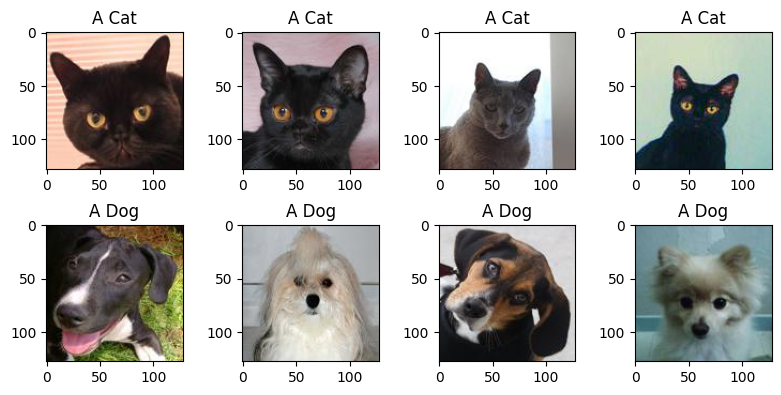

In [4]:
f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(train_cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(train_dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()

## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [5]:
help(torch.tensor)

Help on built-in function tensor in module torch:

tensor(...)
    tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.
    
    .. warning::
    
        When working with tensors prefer using :func:`torch.Tensor.clone`,
        :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
        readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
        ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
        is equivalent to ``t.clone().detach().requires_grad_(True)``.
    
    .. seealso::
    
        :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
        :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.
    
    Args:
        data (array_like): Initial data for the tensor. Can be a li

##### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [6]:
image_name = np.random.choice(train_dogs)
dog = to_tensor(Image.open(image_name))
print("The size of 'dog' is:", dog.size())
dog

The size of 'dog' is: torch.Size([3, 128, 128])


tensor([[[0.2824, 0.2824, 0.2863,  ..., 0.1451, 0.1647, 0.1961],
         [0.2863, 0.2902, 0.2902,  ..., 0.1529, 0.1647, 0.1882],
         [0.2941, 0.2941, 0.2980,  ..., 0.1686, 0.1686, 0.1765],
         ...,
         [0.2588, 0.2549, 0.2471,  ..., 0.2275, 0.2196, 0.2157],
         [0.2588, 0.2510, 0.2431,  ..., 0.2235, 0.2157, 0.2118],
         [0.2588, 0.2510, 0.2431,  ..., 0.2275, 0.2275, 0.2235]],

        [[0.1725, 0.1725, 0.1765,  ..., 0.0745, 0.0941, 0.1255],
         [0.1765, 0.1804, 0.1804,  ..., 0.0824, 0.0941, 0.1176],
         [0.1843, 0.1843, 0.1882,  ..., 0.0980, 0.0980, 0.1059],
         ...,
         [0.3451, 0.3412, 0.3333,  ..., 0.3137, 0.3059, 0.3020],
         [0.3451, 0.3373, 0.3294,  ..., 0.3098, 0.3020, 0.2980],
         [0.3451, 0.3373, 0.3294,  ..., 0.3137, 0.3137, 0.3098]],

        [[0.0863, 0.0863, 0.0902,  ..., 0.0275, 0.0471, 0.0784],
         [0.0902, 0.0941, 0.0941,  ..., 0.0353, 0.0471, 0.0706],
         [0.0902, 0.0902, 0.0941,  ..., 0.0431, 0.0431, 0.

It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

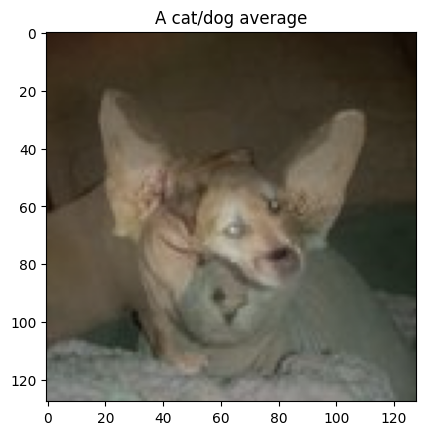

In [7]:
image_name = np.random.choice(train_cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [8]:
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)

#### Mathematical operations

In [9]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [10]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [11]:
t.requires_grad = True
# t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.23502774, 0.64993287],
       [0.84714806, 0.48810172]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you compute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [12]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

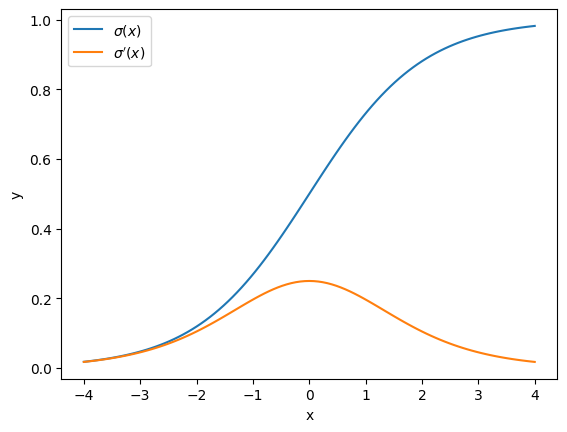

In [13]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = r"$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = r"$\sigma'(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, calculations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards. GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. Hence by default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor using a GPU, you need to move its data to the GPU's memory.


> **Note:** If you are using Google Colab, you may need to enable GPU hardware acceleration by `Go to Menu > Runtime > Change runtime` and change hardware acceleration to GPU.

In [14]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

False


### Building custom models in pytorch using `nn.Module`

[torch.nn](https://pytorch.org/docs/stable/nn.html) contains most neural network layers you will need. To define a custom architecture, create a new class that inherits from `nn.Module`, ensuring that you define a `forward` method. The `forward` method should then pass its input to layers defined in the constructor.

When building deep models, it is highly recommended to use `nn.Sequential`.

Below you will examples of a fully connected network and a convolutional network.

In [15]:
class FCExample(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequentual(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)


class ConvExample(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.fc_net = nn.LazyLinear(out_features=1)

    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        x = self.fc_net(x)
        return x

## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder` (that we imported as `train_folder`), which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.

Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [16]:
images = ImageFolder(train_folder)

You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label, which is 0 for cat and 1 for dog.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


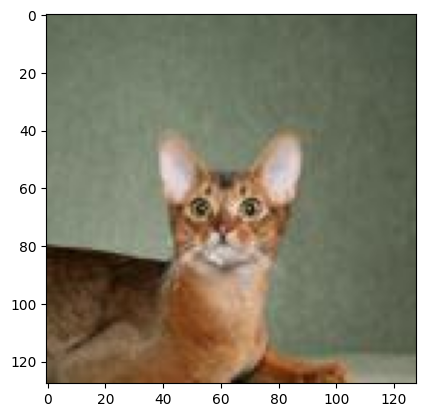

In [17]:
image, label = images[0]
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)


However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

There are also other useful transformations one can do. The most common transform is usually some sort of normalization. Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0. The `Normalize` transform takes as input the mean and standard deviation of each channel, so we first need to calculate those

In [18]:
# Create an ImageFolder without normalization
raw_train_transform = transforms.Compose([transforms.ToTensor()])
train_tensors = ImageFolder(train_folder, transform=raw_train_transform)

def get_mean_std(dataset):
    # Compute mean and std
    data_mean = torch.zeros(3)
    data_std = torch.zeros(3)

    # Only computing mean and std over the width and height dimensions, giving us one value per channel
    for image, _ in dataset:
        data_mean += image.mean(dim=(1,2))
        data_std += image.std(dim=(1,2))

    data_mean /= len(dataset)
    data_std /= len(dataset)

    return data_mean, data_std

# Calculating mean and std for images without normalization
train_mean, train_std = get_mean_std(train_tensors)


Also, in order to simplify the training loop later, we will also add a `target_transform` that converts the labels into floats and adds an extra dimension. It's a good idea to transform your data once into the correct form, so that you don't have to waste resources transforming data in your training loop.

In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)
])
target_transform = transforms.Lambda(lambda y: torch.tensor(y, dtype=torch.float32).unsqueeze(-1))
train_data = ImageFolder(train_folder, transform=transform, target_transform=target_transform)

Let's check that we have mean 0 and std 1 now and also look at the shapes of the data

In [20]:
print(f"{get_mean_std(train_data)=}")
x, y = train_data[0]
print(f"{x.shape=}, {y.shape=}")

get_mean_std(train_data)=(tensor([ 8.5138e-07,  1.0484e-06, -4.4215e-07]), tensor([1.0000, 1.0000, 1.0000]))
x.shape=torch.Size([3, 128, 128]), y.shape=torch.Size([1])


For the training, we further split the data into a training and validation set:

In [21]:
n_train = int(0.90 * len(images))
n_val = len(images) - n_train
training_data_catsndogs, validation_data_catsndogs = torch.utils.data.random_split(train_data, (n_train, n_val))

## Exercise 4: The training loop [1 point]

In the cell below you find code for a typical training loop in `pytorch`. Note that this function passes over the dataset only **once**, which we usually call an **epoch**. We often need to train for several epochs to achieve desired performance.

Look at the function below and answer the following questions: 

- What is the purpose behind providing two different dataloaders?
- What functions do the calls `model.train()` and `model.eval()` have? Why are these calls important?
- Paste the line of code that is responsible for calculating the gradients w.r.t model parameters.
- Paste the line of code that updates the model parameters.

In [ ]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a useful docstring, but that would
    give away the answer for the exercise.
    """

    model.train()
    # model is assumed to already be on the correct device for performance reasons
    # model.to(device)

    training_loss = 0.0
    n = len(training_loader)

    for i, (x, y) in enumerate(training_loader):

        # Set gradients to zero.
        optimizer.zero_grad()

        # Move input to device
        x = x.to(device)
        y = y.to(device)

        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y)
        l.backward()
        optimizer.step()

        training_loss += l.item()
        print("Batch ({} / {}): Loss {:.2f}".format(i, n, l.item()), end="\r")

    training_loss /= n

    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)

    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)

        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred,y)

        validation_loss += l.item()
    validation_loss /= n

    return (training_loss, validation_loss)

We have to loaders because we want to do different things with the different data sets. For the training data we want to adapt the model after every input. But for the validation data we only want to test the model and not use the results to improve the fit.

They change the mode of the model from training to evaluation/validation. They are important for similar reasons as in the previous question.

Line which calculates gradients:
        l.backward()

Line which updates model parameters:
        optimizer.step()


## Dataloaders and loss

With the model and training loop in place, we are nearly able to start training the network. However, a few details remain to be sorted out.

The `training_data_catsndogs` and `validation_data_catsndogs` object defined above can be used to iterate over the data, but only on a per sample basis. For the training of a neural network, however, we typically want to iterate through the data in batches. To take care of this, `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [ ]:
training_loader_catsndogs = DataLoader(training_data_catsndogs, batch_size=32, shuffle=True)
validation_loader_catsndogs = DataLoader(validation_data_catsndogs, batch_size=32, shuffle=True)

Next, we need to choose a suitable training loss to minimize. We will use the Binary Cross Entropy with logits loss that combines a Sigmoid layer and the BCELoss in one single class. 

You can find and read more about other loss functions under [`torch.nn`](https://pytorch.org/docs/stable/nn.html).

> **Note**: The loss function is applied **directly** to the output of the network in the `train_epoch` function defined above. That is why we use a loss that also includes a sigmoid function. If we take the output as-is, it has the potential to be any real-valued number. By applying the sigmoid function, we bound the output to values between [0,1], which better corresponds to a predicted probability of cat (0) vs. dog (1).

In [24]:
loss = torch.nn.BCEWithLogitsLoss()

You will also need to choose an optimizer. The most popular optimizer is [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html), which is basically SGD but adds a fewer other [details](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam), such as momentum.

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [25]:
if torch.cuda.is_available():
    device = torch.device('cuda') # Default CUDA device
    print("Using GPU")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using CPU


## Exercise 5: Training a fully connected network [3 points]

### a) [1 point]
Define a fully connected network with two hidden layers, each with 32 units. It should take images of shape $(B,H,W)$ where the height $H$ and width $W$ are unknown but fixed, and output the probability of the image containing a dog.
> **Tips**:
> - Use `nn.LazyLinear` as the first layer.
> - Use `torch.reshape` to reshape the image into a format that `nn.LazyLinear` accepts

#### 📝 Your answer here:

In [71]:
class FCModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.LazyLinear(32),
        nn.Linear(32,1),
        nn.Sigmoid()
        )

    def forward(self, x):
        shape = x.shape
        data = torch.reshape(x,(shape[0],-1))
        return self.net(data)
        
fc_model = FCModel().to(device)

### b) [2 points]

Train the neural network for 10 epochs with learning rate `1e-3` using Adam and plot the resulting training and validation losses.

Comment on the resulting losses. Is there a difference between training loss and validation loss? If so, why?

#### 📝 Your answer here:

In [ ]:
fc_model = FCModel().to(device)
training_loss = torch.zeros(10)
validation_loss = torch.zeros(10)
times = range(10)
optimizer = torch.optim.Adam(fc_model.parameters(),lr = 1e-3)
for epoch in times:
    training_loss[epoch], validation_loss[epoch] = train_epoch(training_loader_catsndogs, validation_loader_catsndogs, fc_model, loss, optimizer, device)
plt.plot(times,training_loss, label = "Training loss")
plt.plot(times,validation_loss, label = "Validation loss")

plt.grid()
plt.legend()
plt.show()

## Exercise 6: Training a convolutional network [1 point]

### a) [1 point]
Below you will find a convolutional model that we will train in the next exercise. 

Use `B` to denote batch size.
- What size can the input to the network have? You can assume that the input is large enough in each required dimension, such that no layer crashes because the input is too small.
- What is the output size?

In [103]:
class ConvModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),

            nn.Conv2d(16, 32, kernel_size=4, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.LazyLinear(out_features=1)

    def forward(self, x):
        conv_output = self.conv_net(x)
        conv_output_flat = conv_output.reshape(x.size(0), -1)
        return self.fc(conv_output_flat)

conv_model = ConvModel().to(device)

#### 📝 Your answer here:

Since the initial 2d convolution takes 3 inputs, the input should be of size 3xWxH. The output is of size 1 since the model always ends with a linear transform into 1 node.

Since the initial 

### b) [0 points]

Train the neural network for 10 epochs with learning rate `1e-3` using Adam and plot the resulting training and validation losses.

Simply copy the code you wrote in the previous exercise, that is why you don't get any points.

#### 📝 Your answer here:

In [105]:
conv_model = ConvModel().to(device)
training_loss = torch.zeros(10)
validation_loss = torch.zeros(10)
times = range(10)
optimizer = torch.optim.Adam(fc_model.parameters(),lr = 1e-3)
model = conv_model

for epoch in times:
    training_loss[epoch], validation_loss[epoch] = train_epoch(training_loader_catsndogs, validation_loader_catsndogs, model, loss, optimizer, device)
plt.plot(times,training_loss, label = "Training loss")
plt.plot(times,validation_loss, label = "Validation loss")

plt.grid()
plt.legend()
plt.show()

KeyboardInterrupt: 

## Exercise 7: Training an improved model [3 points]

Now that you have trained two models, create an additional third model that is better than the previous two. You should aim for a validation loss of at most $0.2$.

Some things to try:
- Different learning rates
- Different batch size
- Train for longer
- Different optimizers
- A more complex model
- A more simple model
- Regularization, e.g [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout2d.html).
- Early stopping
- Normalization, e.g [BatchNorm](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)

Briefly motivate your choices.

You may train the model for as long as you want.

Plot the training and validation losses.

#### 📝 Your answer here:


Epoch: 1:

Batch (53 / 54): Loss 0.50
Epoch: 2:

Batch (53 / 54): Loss 0.31
Epoch: 3:

Batch (53 / 54): Loss 0.50
Epoch: 4:

Batch (53 / 54): Loss 0.31
Epoch: 5:

Batch (53 / 54): Loss 0.31
Epoch: 6:

Batch (53 / 54): Loss 0.31
Epoch: 7:

Batch (53 / 54): Loss 0.31
Epoch: 8:

Batch (53 / 54): Loss 0.31
Epoch: 9:

Batch (53 / 54): Loss 0.50
Epoch: 10:

Batch (53 / 54): Loss 0.31
Epoch: 11:

Batch (53 / 54): Loss 0.50
Epoch: 12:

Batch (53 / 54): Loss 0.31
Epoch: 13:

Batch (53 / 54): Loss 0.69
Epoch: 14:

Batch (53 / 54): Loss 0.50
Epoch: 15:



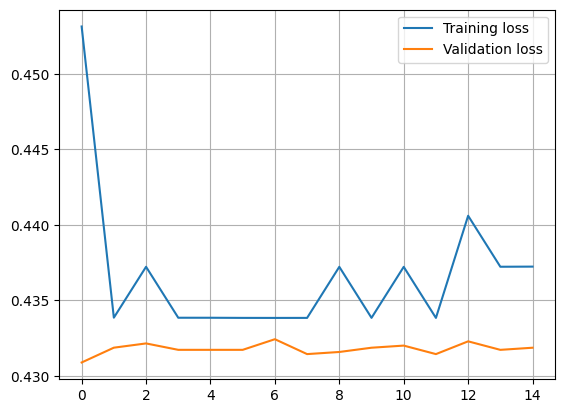

In [67]:
class ImprovedModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=4, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(20),
            nn.MaxPool2d(kernel_size=4, stride=4),
            
            nn.Conv2d(20, 15, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.Dropout2d(p = 0.3),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Sequential(
            nn.LazyLinear(out_features=10),
            nn.Linear(10,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        conv_output = self.conv_net(x)
        conv_output_flat = conv_output.reshape(x.size(0), -1)
        y = self.fc(conv_output_flat)
        return y

improved_model = ImprovedModel().to(device)

training_epochs = 15
training_loss = torch.zeros(training_epochs)
validation_loss = torch.zeros(training_epochs)
times = range(training_epochs)
optimizer = torch.optim.Adam(improved_model.parameters(),lr = 1e-3)

model = improved_model
modified_training_loader_catsndogs = DataLoader(training_data_catsndogs, batch_size=50, shuffle=True)
modified_validation_loader_catsndogs = DataLoader(validation_data_catsndogs, batch_size=50, shuffle=True)
loss = torch.nn.BCEWithLogitsLoss()
for epoch in times:
    print(f"\nEpoch: {epoch+1}:\n")
    training_loss[epoch], validation_loss[epoch] = train_epoch(modified_training_loader_catsndogs, modified_validation_loader_catsndogs, model, loss, optimizer, device)
plt.plot(times,training_loss, label = "Training loss")
plt.plot(times,validation_loss, label = "Validation loss")

plt.grid()
plt.legend()
plt.show()

## Model evaluation and comparison [5 points]

After training our models, we are of course interested in their performance. While the loss can be a useful tool to guide model design, it doesn't actually tell us anything about how **good** the model is.

To reduce the number of `.to` calls, we also move all models to the cpu.

In [260]:
fc_model = fc_model.to("cpu")
conv_model = conv_model.to("cpu")
improved_model = improved_model.to("cpu")

### a) [2 points]

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$.

#### 📝 Your answer here:

In [70]:
def receiver_operating_characteristic(model,
                                      validation_loader: torch.utils.data.DataLoader,
                                      ps):
    """
    Computes receiver operating characteristic for given model and
    validation data.

    Arguments:
        model: The pytorch model to evaluate.
        validation_loader: torch DataLoader to use to iterate over validation data.
        ps: Iterable containing the values of the discrimination threshold in
           increasing order.
    Returns:
        (fpr, tpr): Tuple containing the false positive rates (fpr) and the true
            positive rates as numpy.ndarrays.
    """
    fpr, tpr = torch.zeros(len(ps)), torch.zeros(len(ps))
    for i in range(len(ps)):
        for (x, y) in validation_loader:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            print(abs(y_pred-y).mean())

    

receiver_operating_characteristic(fc_model, modified_validation_loader_catsndogs, torch.linspace(0,1,10))

NameError: name 'fc_model' is not defined

### b) [1 point]

One way to summarize the receiver operator characteristic (ROC) is to compute the area under the curve. This can be done using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Complete the code below and write a function for computing the area under the receiver operator characteristic curve (AUC ROC) using the trapezoidal rule.

    Note that you are not allowed to use any built-in trapeziodal function (e.g. the one from NumPy). You are to make your own implementation.


#### 📝 Your answer here:

In [ ]:
def auc_roc(fpr, tpr):
    """
    Computes area under receiver operating characteristic curve using the
    trapeziodal rule for given false positive and true positive rates.

    Arguments:
        fpr: False positive rates.
        tpr: True positive rates.

    Returns:
        auc_roc: Area under the receiver operating characteristic curve as
            float value
    """

### c) [2 points]

Now evaluate the performance of your three models on the `catsndogs` test data, which is available in the `catsndogs.test` module. Note that `catsndogs.test.folder` has already been imported as `test_folder`.

- Plot ROC curves and compute+print AUC ROC for all models. The ROC curves should be visible within the same figure for comparison. Make sure to label the axes and include a legend.
- Compute and print the accuracy of each model for a discimination threshold p = 0.5

#### 📝 Your answer here: